In [1]:
# Import require tools

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('data-export.csv')

In [6]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [7]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [8]:
df = df.drop(index = 0).reset_index(drop=True)
df.columns = ['channel group', 'datahours', 'users', 'session', 'engaged sessions', 'Average engagement time per session', 'Engaged sessions per user', 'Events per session', 'Engagement rate', 'Event count']

In [9]:
df.head

<bound method NDFrame.head of        channel group   datahours users session engaged sessions  \
0             Direct  2024041623   237     300              144   
1     Organic Social  2024041719   208     267              132   
2             Direct  2024041723   188     233              115   
3     Organic Social  2024041718   187     256              125   
4     Organic Social  2024041720   175     221              112   
...              ...         ...   ...     ...              ...   
3177      Unassigned  2024042806     0       1                0   
3178      Unassigned  2024043005     0       1                0   
3179      Unassigned  2024043006     0       1                0   
3180      Unassigned  2024050105     0       1                0   
3181      Unassigned  2024050307     0       1                0   

     Average engagement time per session Engaged sessions per user  \
0                     47.526666666666700        0.6075949367088610   
1                      32

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   datahours                            3182 non-null   object
 2   users                                3182 non-null   object
 3   session                              3182 non-null   object
 4   engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [11]:
df['datahours'] = pd.to_datetime(df['datahours'], format= '%Y%m%d%H', errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datahours                            3182 non-null   datetime64[ns]
 2   users                                3182 non-null   object        
 3   session                              3182 non-null   object        
 4   engaged sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [13]:
numeric_cols = df.columns.drop(['channel group', 'datahours'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df['hours'] = df['datahours'].dt.hour

In [14]:
df.head()

,channel group,datahours,users,session,engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datahours                            3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   session                              3182 non-null   int64         
 4   engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  hours       

In [16]:
df.describe()

,datahours,users,session,engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


### sessions and user over time

In [17]:
# 1. What patterns or trends can you observe in website sessions and user over time ?

In [18]:
sns.set(style='whitegrid')

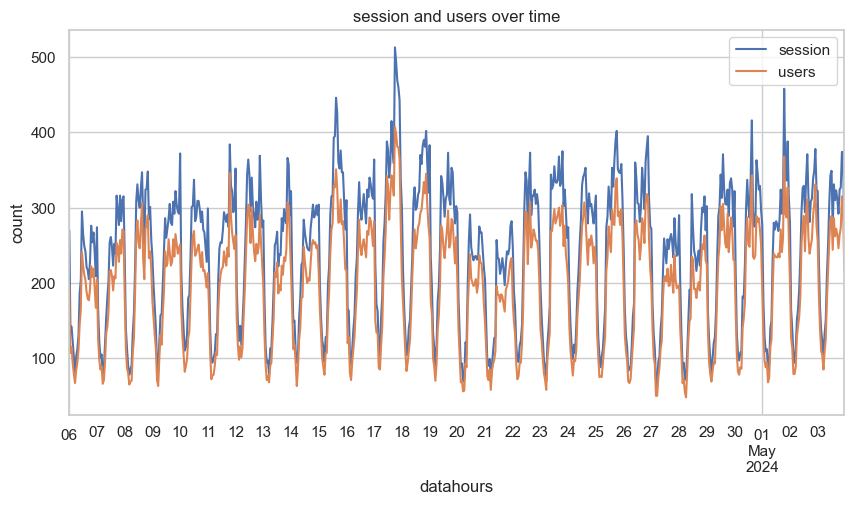

In [19]:
plt.figure(figsize=(10,5))
df.groupby('datahours') [['session', 'users']].sum().plot(ax=plt.gca())
plt.title('session and users over time')
plt.xlabel('datahours')
plt.ylabel('count')
plt.show()

In [20]:
# here we can see the patten or trands time between 15 to 21 no of users heigh to use the website 

In [21]:
'''2. Which marketing channel broght the heighest number of users to the website, and how can we use the insight to improve traffic from other sources ?'''

'2. Which marketing channel broght the heighest number of users to the website, and how can we use the insight to improve traffic from other sources ?'

### total users by channel

C:\Users\ajayp\AppData\Local\Temp\ipykernel_940\1131576665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = 'channel group', y ='users', estimator = np.sum, palette = 'viridis')


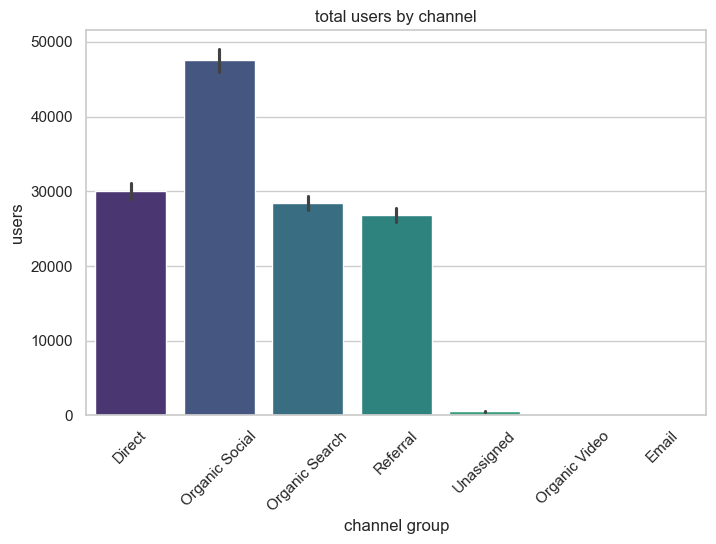

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x = 'channel group', y ='users', estimator = np.sum, palette = 'viridis')
plt.title('total users by channel')
plt.xticks(rotation=45)
plt.show()

In [23]:
# we have to work on these channel for create aggenement 
# channel name is 'unassigned', 'organic video', 'Email'

In [24]:
# 3. Which channel has the heighest average emgagement time, and what does that tell us about user behaviour and content effectiveness ?

In [25]:
df.head()

,channel group,datahours,users,session,engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


### avarage engagement time by channel

C:\Users\ajayp\AppData\Local\Temp\ipykernel_940\1745299179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'channel group', y= 'Average engagement time per session', estimator=np.mean, palette='magma')


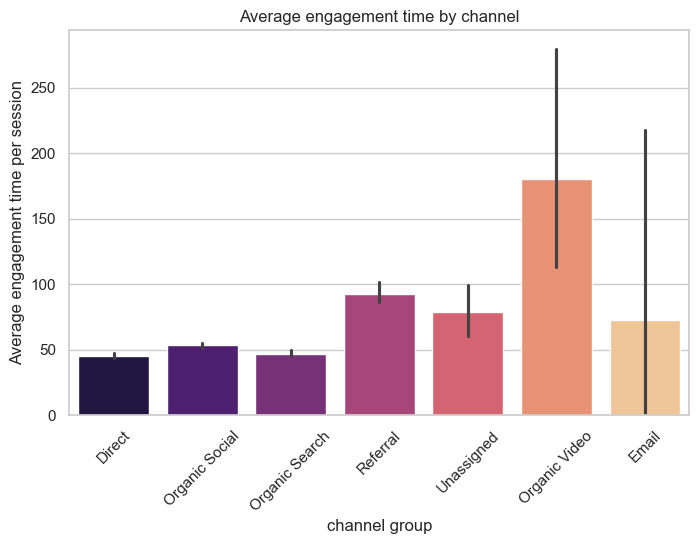

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x= 'channel group', y= 'Average engagement time per session', estimator=np.mean, palette='magma')
plt.title('Average engagement time by channel')
plt.xticks(rotation=45)
plt.show()

In [27]:
# here we can see organic video channel hold most of time to user 
# and referral or email both channel have the capability to grow like organic video channel

In [28]:
# 4. How does engagement rate vary across different traffic channel ?

### Engagement rate distribution by channel

C:\Users\ajayp\AppData\Local\Temp\ipykernel_940\2979233771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'channel group', y = 'Engagement rate', palette='coolwarm')


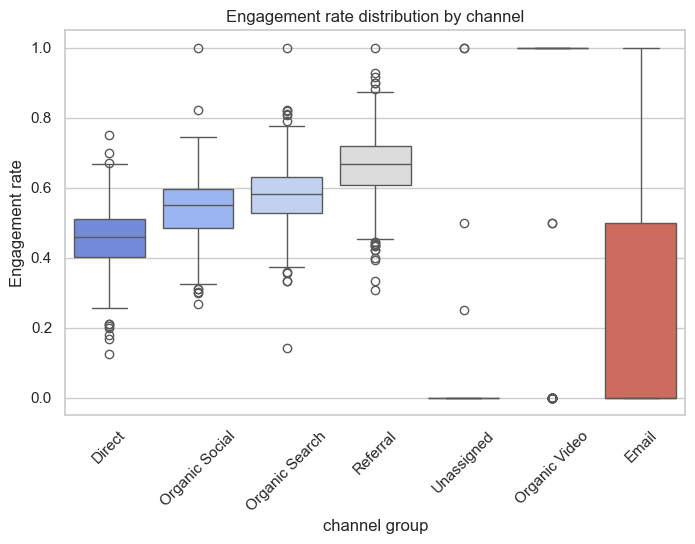

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'channel group', y = 'Engagement rate', palette='coolwarm')
plt.title('Engagement rate distribution by channel')
plt.xticks(rotation=45)
plt.show()

In [30]:
# referral has best engagement rate

In [31]:
# 5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels ?ab

### Engaged vs non engaged sessions

In [32]:
session_df = df.groupby('channel group')[['session', 'engaged sessions']].sum().reset_index()
session_df['Non-Engaged'] = session_df['session'] - session_df['engaged sessions']
session_df_melted = session_df.melt(id_vars='channel group', value_vars=['engaged sessions', 'Non-Engaged'])

plt.figure(figsize=(8,5))
sns.barplot(data=df, x = 'channel group', y='value', hue='variable')
plt.title('Engaged Vs Non-Engaged Sessions')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `value` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [33]:
# 6. At what hours of the day does each channel drive the most traffic ?

### traffic by hours and channel

In [34]:
df.head(3)

,channel group,datahours,users,session,engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23


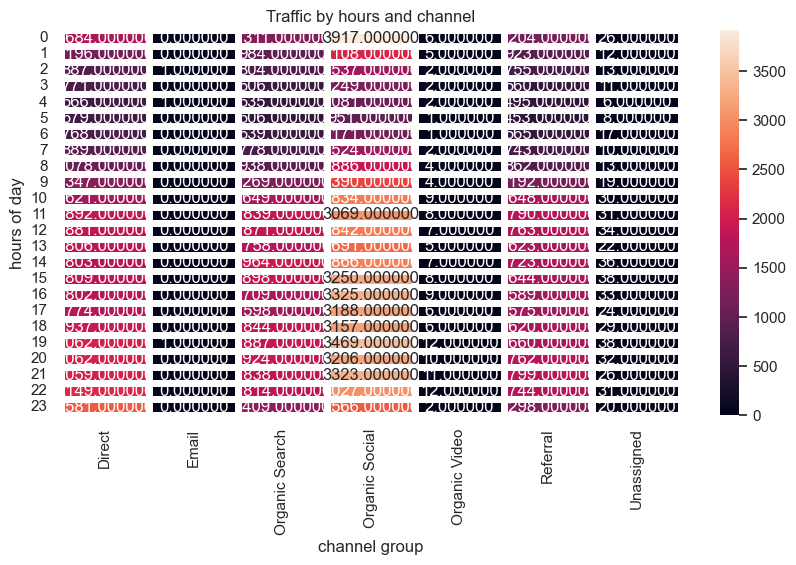

In [35]:
heatmap_data = df.groupby(['hours', 'channel group',])['session'].sum().unstack().fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, linewidths=5, annot=True, fmt='0f')
plt.title('Traffic by hours and channel')
plt.xlabel('channel group')
plt.ylabel('hours of day')
plt.show()

In [36]:
# 7. Is there any correlation between high traffic (sessions) and high engagement rate over time ?

### Engagement rate vs sessions over time 

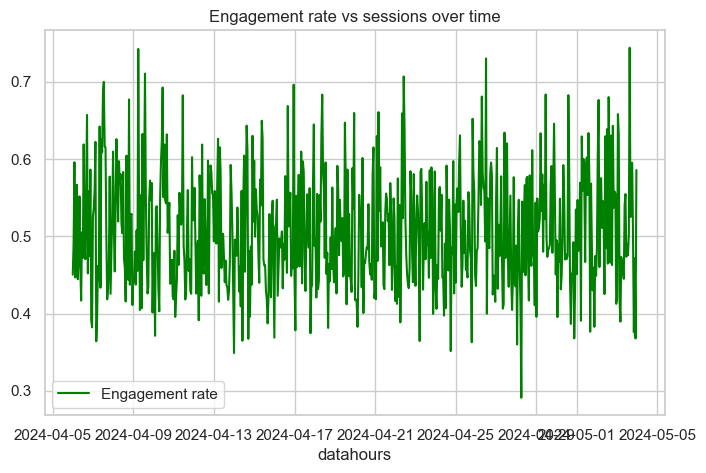

In [37]:
df_plot = df.groupby('datahours')[['Engagement rate', 'session']].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(df_plot['datahours'], df_plot['Engagement rate'], label='Engagement rate', color='green')
plt.title('Engagement rate vs sessions over time')
plt.xlabel('datahours')
plt.legend()
plt.grid(True)
plt.show()